Q1 Sobel kernel, Gaussian kernel, The 5 Haar-like masks :
import opencv version 4.8.0
import requests to download url

(314, 546)
(313, 546)
(314, 545)
(312, 546)
(314, 544)
(313, 545)


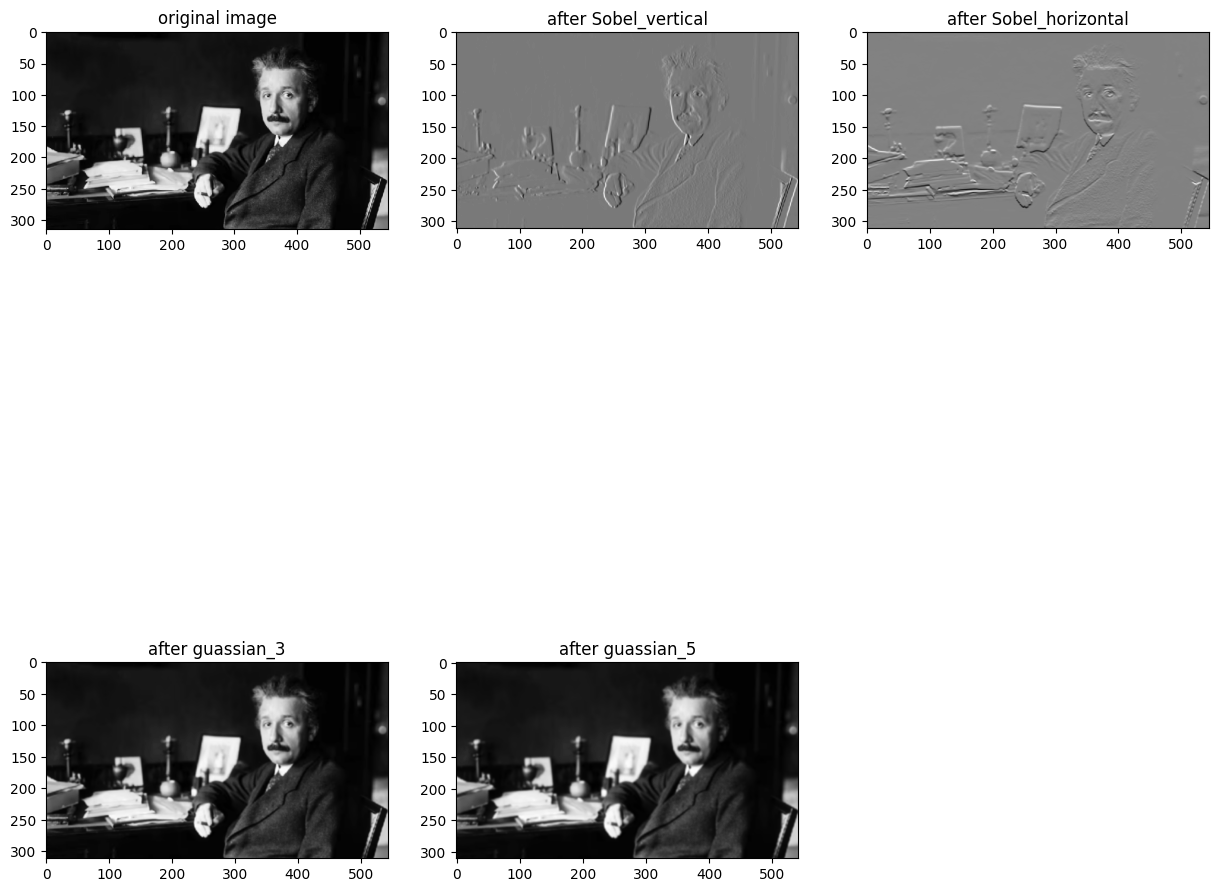

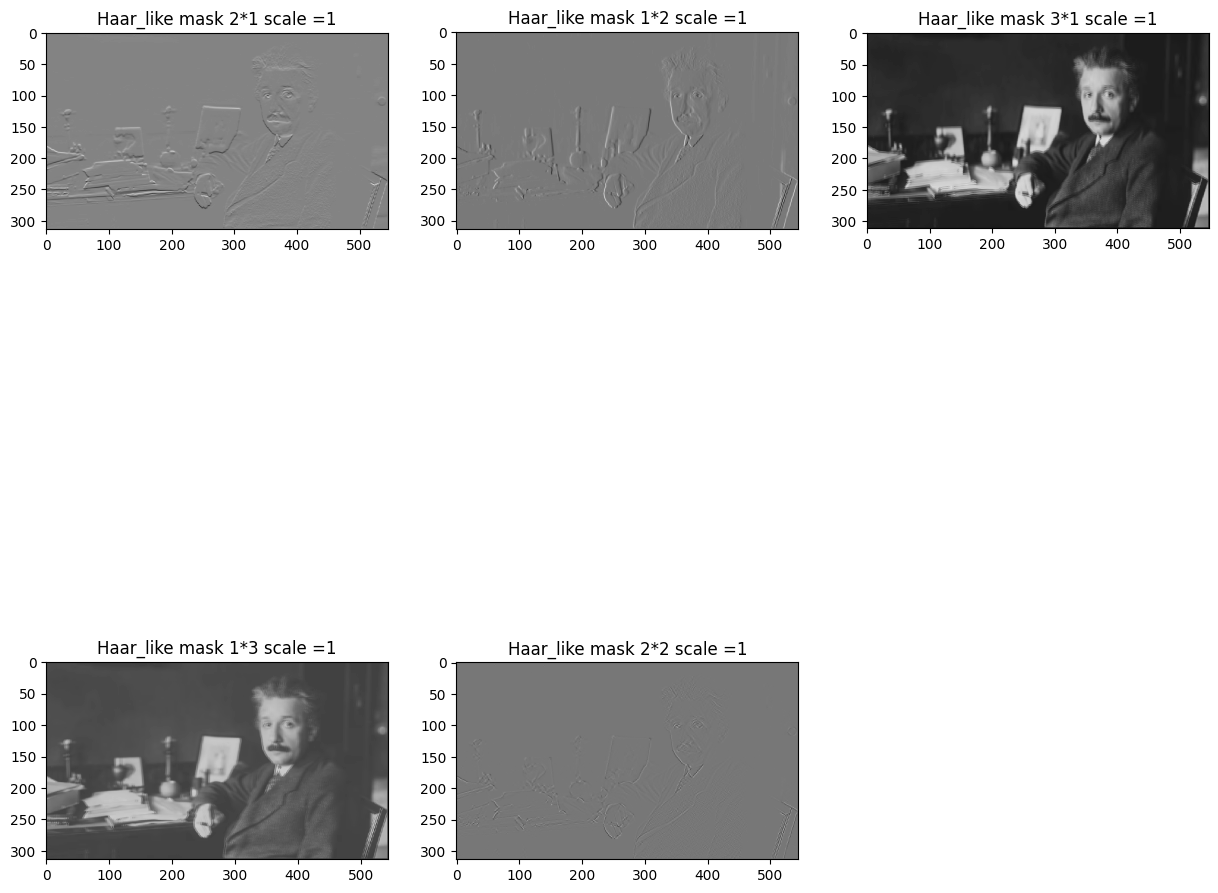

In [2]:
"""kernel and mask with scale=1
   programe for 2d convolution
"""
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt


url = 'https://tanrobby.github.io/teaching/ece_visual/assignment1/img/einstein.png'
response = requests.get(url)
image_download = np.frombuffer(response.content, dtype=np.uint8)
image = cv2.imdecode(image_download, cv2.IMREAD_GRAYSCALE)
# plt.imshow(image,cmap = 'gray')   # show original image
image_x, image_y= image.shape
print(image.shape)

integral_image= np.zeros([image_x+1, image_y+1])
for i in range(1,image_x):
    for j in range(1,image_y):
        integral_image[i][j]= integral_image[i-1][j]+image[i-1][j-1]+integral_image[i][j-1]-integral_image[i-1][j-1]

sobel_kernel_v = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
sobel_kernel_h = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
guassian_kernel_3 = 1/16 * np.array([[1,2,1],
                                     [2,4,2],
                                     [1,2,1]])
guassian_kernel_5 = 1/256 * np.array([[1,4,6,4,1],
                                     [4,16,24,16,4],
                                     [6,24,36,24,6],
                                     [4,16,24,16,4],
                                     [1,4,6,4,1]])

def conv_2d(image, kernel):
    img_x, img_y= image.shape
    k_x, k_y=kernel.shape
    x,y= img_x-k_x+1, img_y-k_y+1
    res=[]
    for i in range(0,x):
        line=[]
        for j in range(0,y):
            val= image[i:i+k_y, j:j+k_x]
            line.append(np.sum(np.multiply(kernel, val)))
        res.append(line)
    return np.array(res)

def Haar_like_mask21 (s):
    mask_x, mask_y= 2*s, s
    res = np.zeros((image_x - mask_x + 1, image_y - mask_y + 1))
    for i in range(image_x-mask_x):
        for j in range(image_y-mask_y):
            positive= integral_image[i+mask_x][j+mask_y]-integral_image[i+mask_x][j]-integral_image[i+s][j+mask_y]+integral_image[i+s][j]
            negative= integral_image[i+s][j+mask_y]-integral_image[i+s][j]-integral_image[i][j+mask_y]+integral_image[i][j]
            res[i][j]=positive-negative
    print(res.shape)
    return res

def Haar_like_mask12 (s):
    mask_x, mask_y= s, 2*s
    res = np.zeros((image_x - mask_x + 1, image_y - mask_y + 1))
    for i in range(image_x-mask_x):
        for j in range(image_y-mask_y):
            positive= integral_image[i+mask_x][j+mask_y]-integral_image[i+mask_x][j+s]-integral_image[i][j+mask_y]+integral_image[i][j+s]
            negative= integral_image[i+mask_x][j+s]-integral_image[i+mask_x][j]-integral_image[i][j+s]+integral_image[i][j]
            res[i][j]=positive-negative
    print(res.shape)
    return res

def Haar_like_mask31 (s):
    mask_x, mask_y= 3*s, s
    res = np.zeros((image_x - mask_x + 1, image_y - mask_y + 1))
    for i in range(image_x-mask_x):
        for j in range(image_y-mask_y):
            positive= integral_image[i+mask_x][j+mask_y]-integral_image[i+mask_x][j]-integral_image[i][j+mask_y]+integral_image[i][j]
            negative= integral_image[i+2*s][j+s]-integral_image[i+2*s][j]-integral_image[i+s][j+s]+integral_image[i+s][j]
            res[i][j]=positive-negative*2
    print(res.shape)
    return res
def Haar_like_mask13 (s):
    mask_x, mask_y= s, 3*s
    res = np.zeros((image_x - mask_x + 1, image_y - mask_y + 1))
    for i in range(image_x-mask_x):
        for j in range(image_y-mask_y):
            positive= integral_image[i+mask_x][j+mask_y]-integral_image[i+mask_x][j]-integral_image[i][j+mask_y]+integral_image[i][j]
            negative= integral_image[i+mask_x][j+2*s]-integral_image[i+mask_x][j+s]-integral_image[i][j+2*s]+integral_image[i][j+s]
            res[i][j]=positive-negative*2
    print(res.shape)
    return res
def Haar_like_mask22 (s):
    mask_x, mask_y= 2*s, 2*s
    res = np.zeros((image_x - mask_x + 1, image_y - mask_y + 1))
    for i in range(image_x-mask_x):
        for j in range(image_y-mask_y):
            positive= integral_image[i+mask_x][j+mask_y]-integral_image[i+mask_x][j]-integral_image[i][j+mask_y]+integral_image[i][j]
            negative_1= integral_image[i+mask_x][j+s]-integral_image[i+mask_x][j]-integral_image[i+s][j+s]+integral_image[i+s][j]
            negative_2= integral_image[i+s][j+mask_y]-integral_image[i+s][j+s]-integral_image[i][j+mask_y]+integral_image[i][j+s]
            res[i][j]=positive-negative_1*2-negative_2*2
    print(res.shape)
    return res

#show results
image_after_s_v= conv_2d(image, sobel_kernel_v)
image_after_s_h= conv_2d(image, sobel_kernel_h)
image_after_g_3= conv_2d(image, guassian_kernel_3)
image_after_g_5= conv_2d(image, guassian_kernel_5)
res_1=Haar_like_mask21(1)
res_2=Haar_like_mask12(1)
res_3=Haar_like_mask31(1)
res_4=Haar_like_mask13(1)
res_5=Haar_like_mask22(1)
plt.figure(figsize=(15,15))
plt.subplot(231)
plt.title('original image')
plt.imshow(image,cmap='gray')
plt.subplot(232)
plt.title('after Sobel_vertical')
plt.imshow(image_after_s_v,cmap='gray')
plt.subplot(233)
plt.title('after Sobel_horizontal')
plt.imshow(image_after_s_h,cmap='gray')
plt.subplot(234)
plt.title('after guassian_3')
plt.imshow(image_after_g_3,cmap='gray')
plt.subplot(235)
plt.title('after guassian_5')
plt.imshow(image_after_g_5,cmap='gray')

plt.figure(figsize=(15,15))
plt.subplot(231)
plt.title('Haar_like mask 2*1 scale =1')
plt.imshow(res_1,cmap='gray')
plt.subplot(232)
plt.title('Haar_like mask 1*2 scale =1')
plt.imshow(res_2,cmap='gray')
plt.subplot(233)
plt.title('Haar_like mask 3*1 scale =1')
plt.imshow(res_3,cmap='gray')
plt.subplot(234)
plt.title('Haar_like mask 1*3 scale =1')
plt.imshow(res_4,cmap='gray')
plt.subplot(235)
plt.title('Haar_like mask 2*2 scale =1')
plt.imshow(res_5,cmap='gray')





(305, 542)
(310, 537)
(300, 542)
(310, 532)
(305, 537)


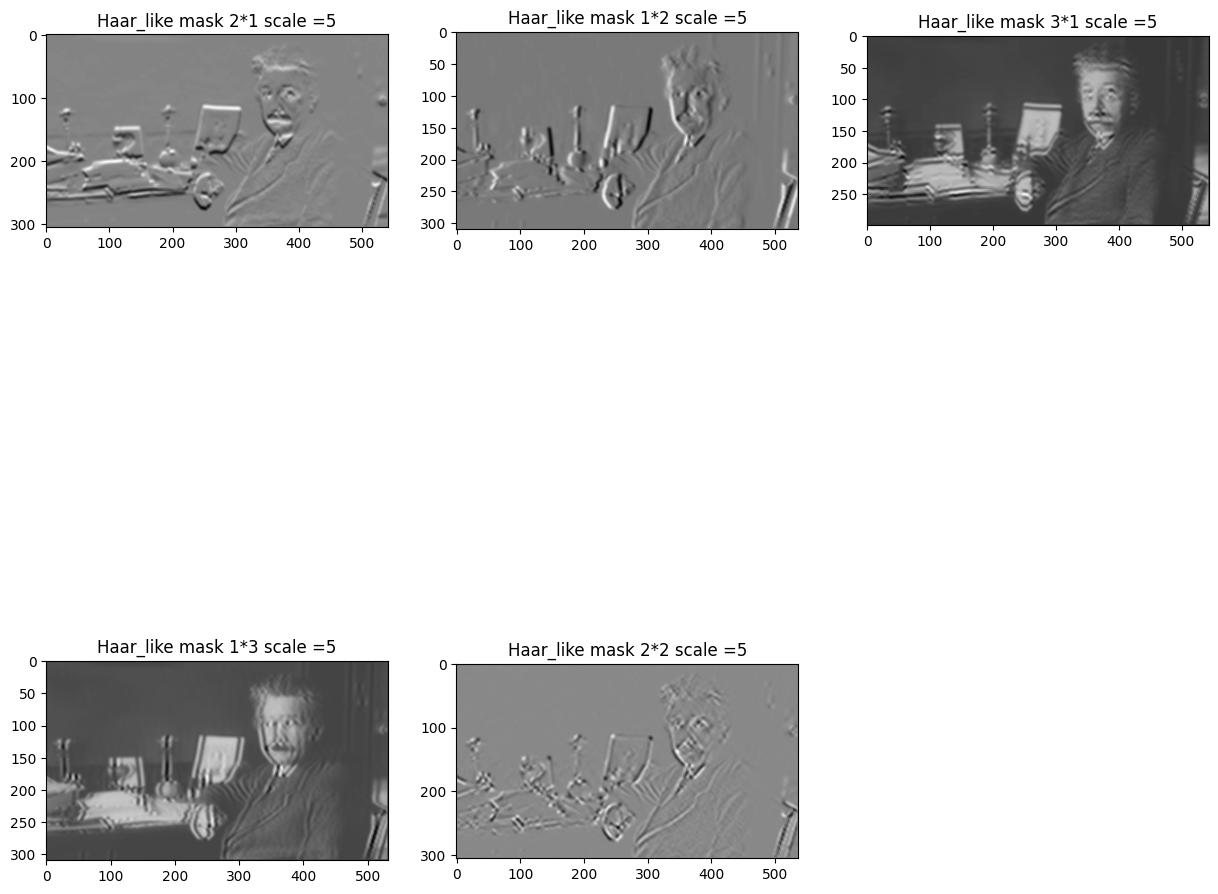

In [7]:
"""mask with scale=input
"""
scale=5
res_1=Haar_like_mask21(scale)
res_2=Haar_like_mask12(scale)
res_3=Haar_like_mask31(scale)
res_4=Haar_like_mask13(scale)
res_5=Haar_like_mask22(scale)
plt.figure(figsize=(15,15))
plt.subplot(231)
plt.title('Haar_like mask 2*1 scale =5')
plt.imshow(res_1,cmap='gray')
plt.subplot(232)
plt.title('Haar_like mask 1*2 scale =5')
plt.imshow(res_2,cmap='gray')
plt.subplot(233)
plt.title('Haar_like mask 3*1 scale =5')
plt.imshow(res_3,cmap='gray')
plt.subplot(234)
plt.title('Haar_like mask 1*3 scale =5')
plt.imshow(res_4,cmap='gray')
plt.subplot(235)
plt.title('Haar_like mask 2*2 scale =5')
plt.imshow(res_5,cmap='gray')


Conclusions: 
1. For sobel kernels it detects the edge of the image, vertical and horizontal kernel detects the vertical edges and horizontal lines respectively.
2. Guassian kernels smooths and blur the image. As the kernel increased from 3 to 5, the effect become more distinct.
3. Haar-like masks of 2*1 and 1*2 size will detect the edge of the image. 2*1 detects the horizontal edges meanwhile 1*2 detects the vertical edges.
Haar-like masks of 3*1 and 1*3 size will detect the line of the image. 3*1 detects the horizontal lines of the image whereas 1*3 mask will detect and extract vertical lines.
Haar-like masks of 2*2 size will detect the four-rectangle features including the features representing corners.
4. As the scale of masks increases, masks can augment the coverage of images, as a result extract more prominent feature that are conducive for feature extraction.

Q2. Extract SIFT keypoints from im01.jpg

In [ ]:
"""extract SIFT keypoints"""
